[Kaggle Project Link](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction)

포르투 세구로라는 브라질 보험 회사에서 주최한 대회
- 자동차 보험과 관련해 보다 정확한 예측 모델을 만들고자 함
- 운전자가 보험금을 청구할 확률을 정확히 예측하는 모델을 만드는 게 목적

# 탐색적 데이터 분석

## 데이터 둘러보기

In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/Kaggle/Safe_Driver_Prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [ ]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [ ]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [ ]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

- 피처명 형식 : 피처명에 다양한 메타 정보가 포함되어 있다.
    - ps_ (분류) _ (분류별 일련번호) _ (데이터 종류)
    - 데이터 종류
        - bin : 이진 피처
        - cat : 명목형 피처
        - 생략 : 순서형 피처 또는 연속형 피처
    - 분류와 분류별 일련변호로는 정보를 확인하기 어렵다. 데이터 종류에서는 유의미한 정보를 얻을 수 있다.

**To-do**
- 결측값이 없다고 나와있지만, -1로 입력되어 있어 출력이 되지 않을 수 있다. -1을 np.NaN으로 변환한 후 개수를 세어본다.
    - missingno 패키지 사용
        - 결측값을 시각화하는 패키지
        - missingno.bar() : 결측값을 막대 그래프 형식으로 시각화
    - 훈련 데이터 값을 직접 바꾸지 않고 copy()를 사용해서 복사본으로 진행한다.

<Axes: >

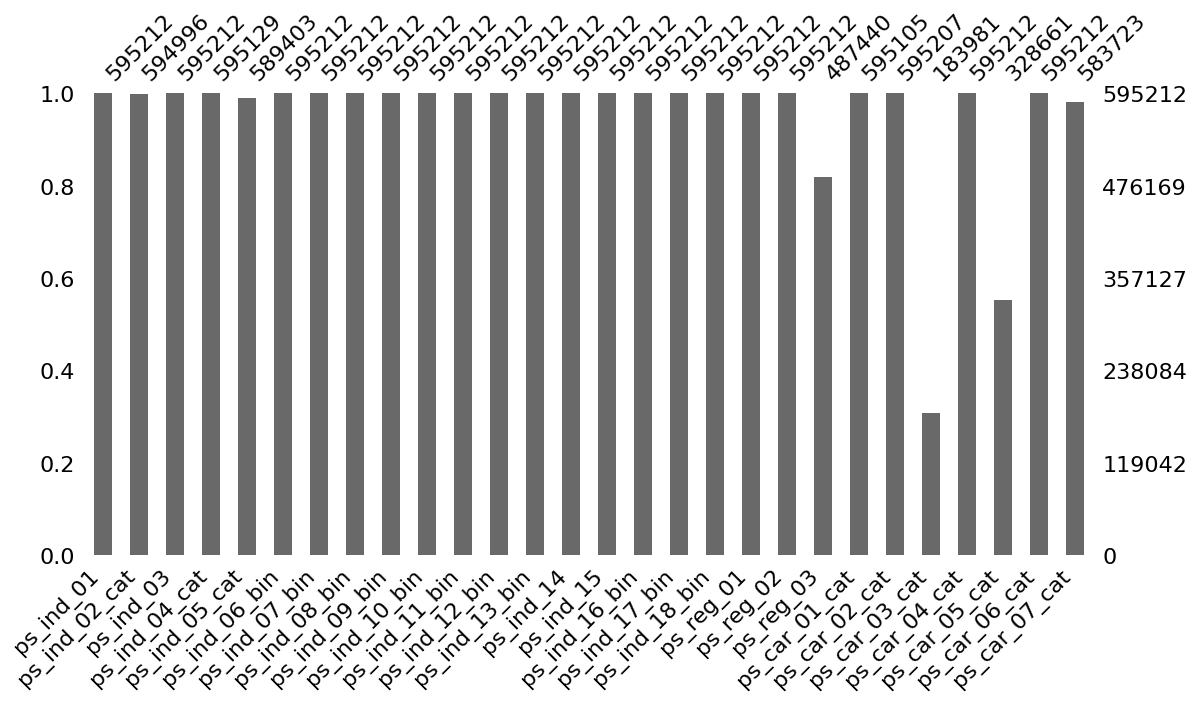

In [ ]:
import numpy as np
import missingno as msno

# 훈련 데이터 복사본에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 일부 시각화
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6))

- 막대 그래프 높이가 낮을수록 결측값이 많다는 뜻이다.
    - ps_reg_03, ps_car_03_cat, ps_car_05_cat 피처에 결측값이 많다.

<Axes: >

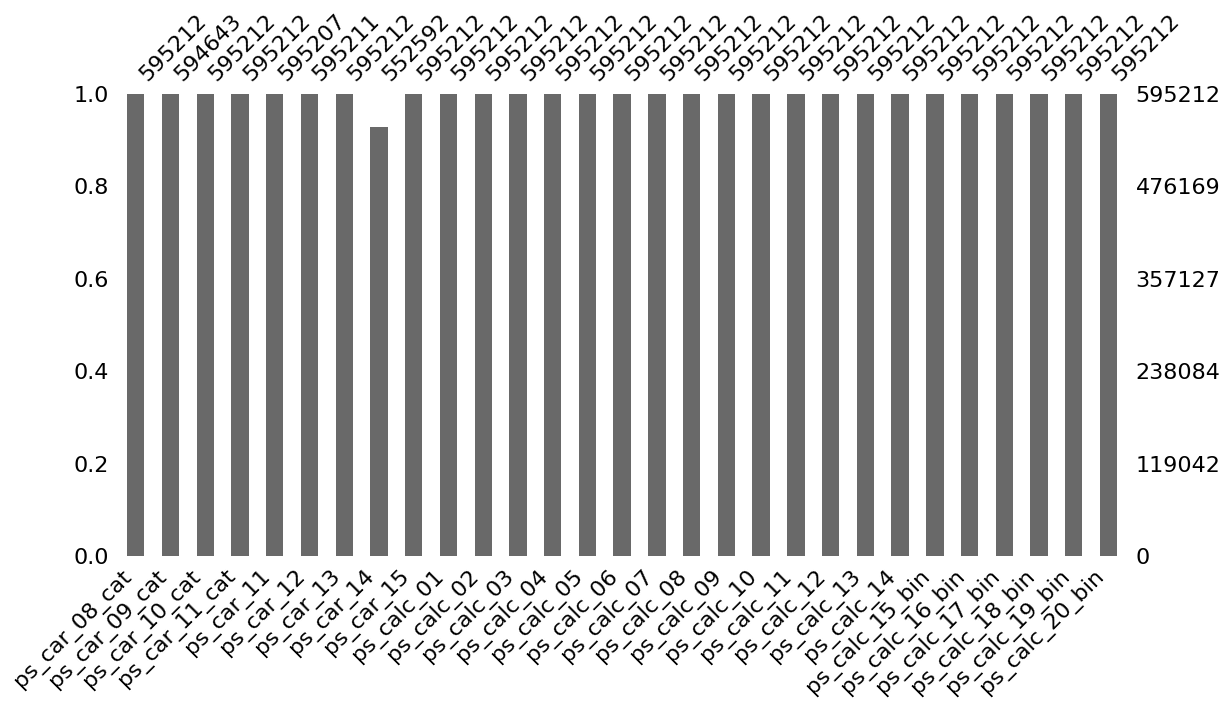

In [ ]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6))

- ps_car_14에 결측값이 조금 있고 나머지는 거의 존재하지 않는다.

### 피처 요약표

In [ ]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None

    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [ ]:
summary = resumetable(train)
summary

데이터셋 형상: (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [ ]:
# 명목형 피처 추출
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [ ]:
# 데이터 타입이 실수인 피처 추출
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

## 데이터 시각화

**To-do**
- 타깃값 분포를 활용해 타깃값이 얼마나 불균형한지 알아본다.
    - 이진 피처, 명목형 피처, 순서형 피처의 고윳값별 타깃값 비율을 살펴본다.
- 고윳값별 타깃값 비율을 확인해 모델링 시 제거해야 할 피처를 선별한다.

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 타깃값 분포

In [ ]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height / total_size * 100

        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0, # x축 위치
                height + total_size * 0.001, # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center') # 가운데 정렬

<ipython-input-17-9939465c8e50>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=train, palette=palette)
<ipython-input-17-9939465c8e50>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x='target', data=train, palette=palette)


Text(0.5, 1.0, 'Target Distribution')

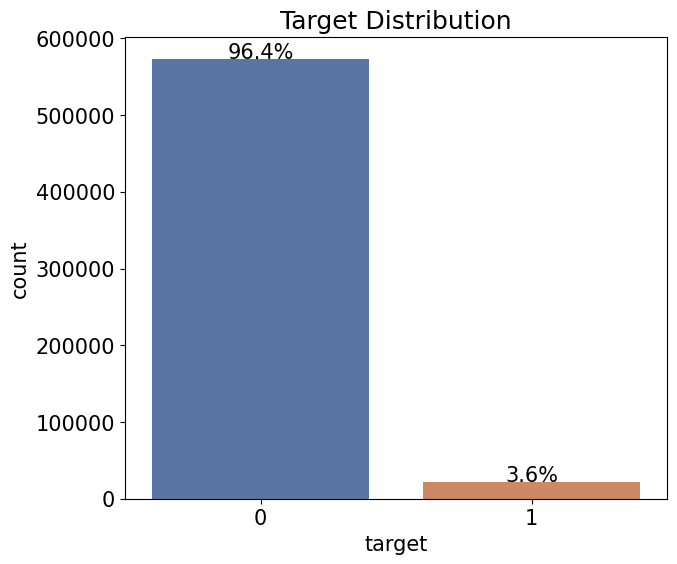

In [ ]:
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

palette = sns.color_palette('deep', 10)
ax = sns.countplot(x='target', data=train, palette=palette)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

- 전체 운전자 중 3.6%(target=1)만 보험금을 청구했다. 즉, 타깃값이 불균형하다.
    - 타깃값 1을 잘 예측하는 것이 중요하다.

**To-do**
- 각 피처의 분포를 알아보기 보다 각 피처의 고윳값별 타깃값 1 비율을 확인하여 해당 피처가 모델링에 필요한지에 대한 여부를 확인한다.
- 고윳값별 타깃값 1 비율이 충분히 차이가 나고 신뢰구간도 작은 피처를 선별한다.

### 이진 피처

In [ ]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12, 18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3) # 서브플롯 좌위/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

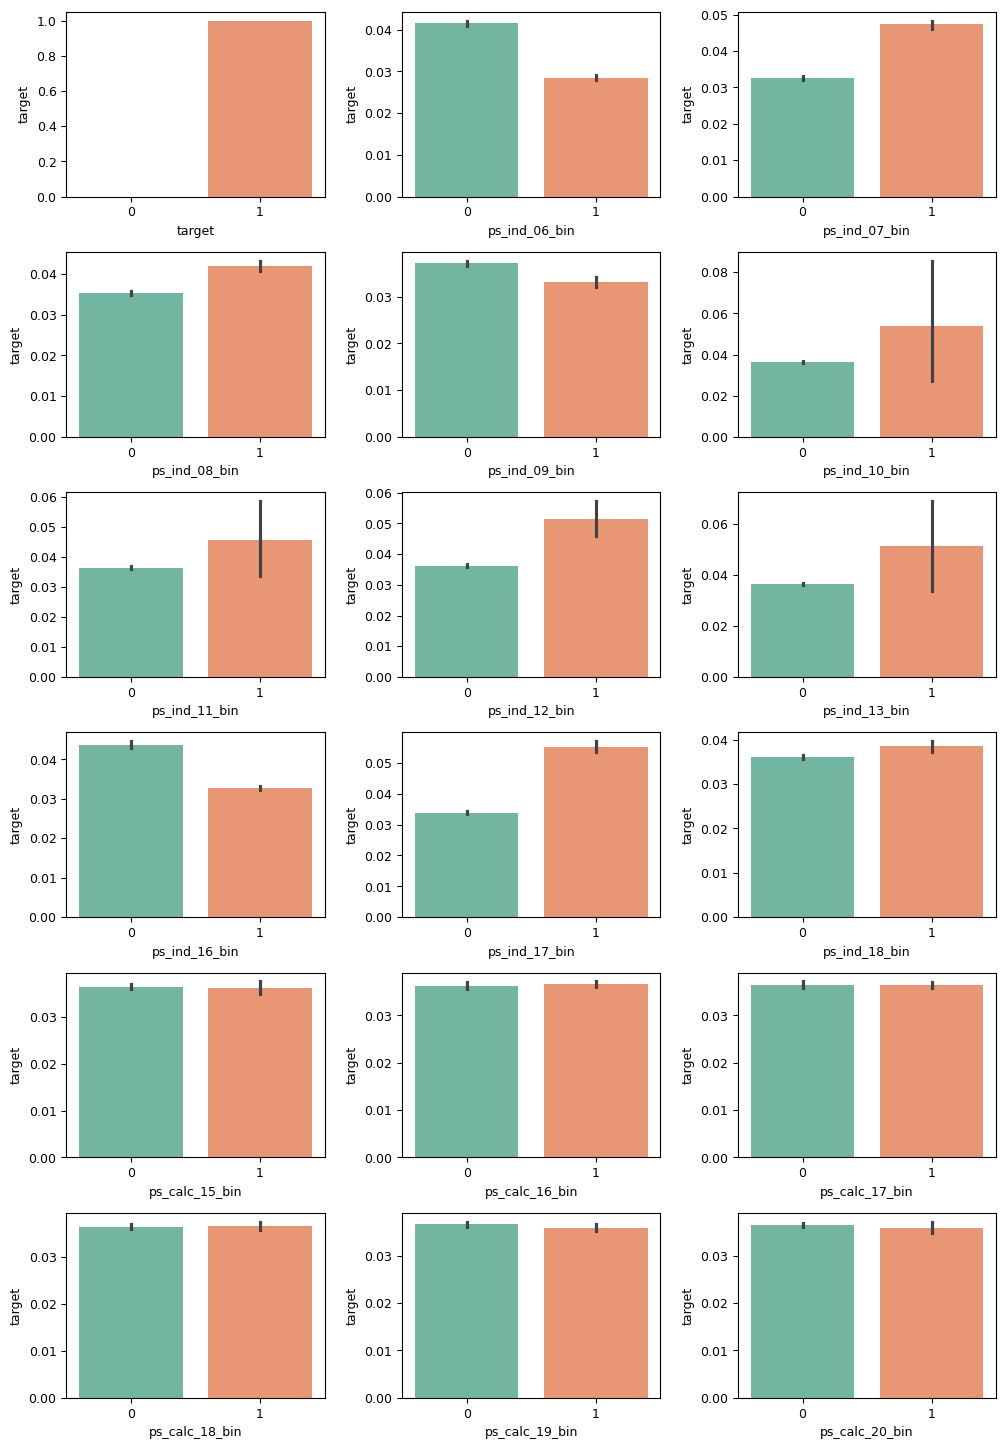

In [ ]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처
plot_target_ratio_by_features(train, bin_features, 6, 3)

- ps_ind_06_bin
    - 값이 0일 때 타깃값의 비율: 타깃값 0(96%), 타깃값 1(4%)
    - 값이 1일 때 타깃값의 비율: 타깃값 0(97.2%), 타깃값 1(2.8%)
    - 고윳값별로 타깃값의 비율이 다르기 때문에 타깃값을 추정하는 예측력이 있는 것으로 판단된다. 신뢰구간 또한 좁기 때문에 모델링 시 도움이 될 것으로 판단된다.

- ps_ind_10_bin ~ ps_ind_13_bin
    - 신뢰구간이 넓어 통계적 유효성이 떨어지므로 제거하도록 한다.

- ps_calc_15_bin ~ ps_calc_20_bin
    - 고윳값별 타깃값 비율 차이가 없으므로 타깃값 예측력이 없을 것으로 판단되므로 제거하도록 한다.
    - calc 분류의 이진 피처는 모두 타깃값 비율에 차이가 없으므로 이후 다른 피처도 차이가 없는지 확인해본다.

### 명목형 피처

<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

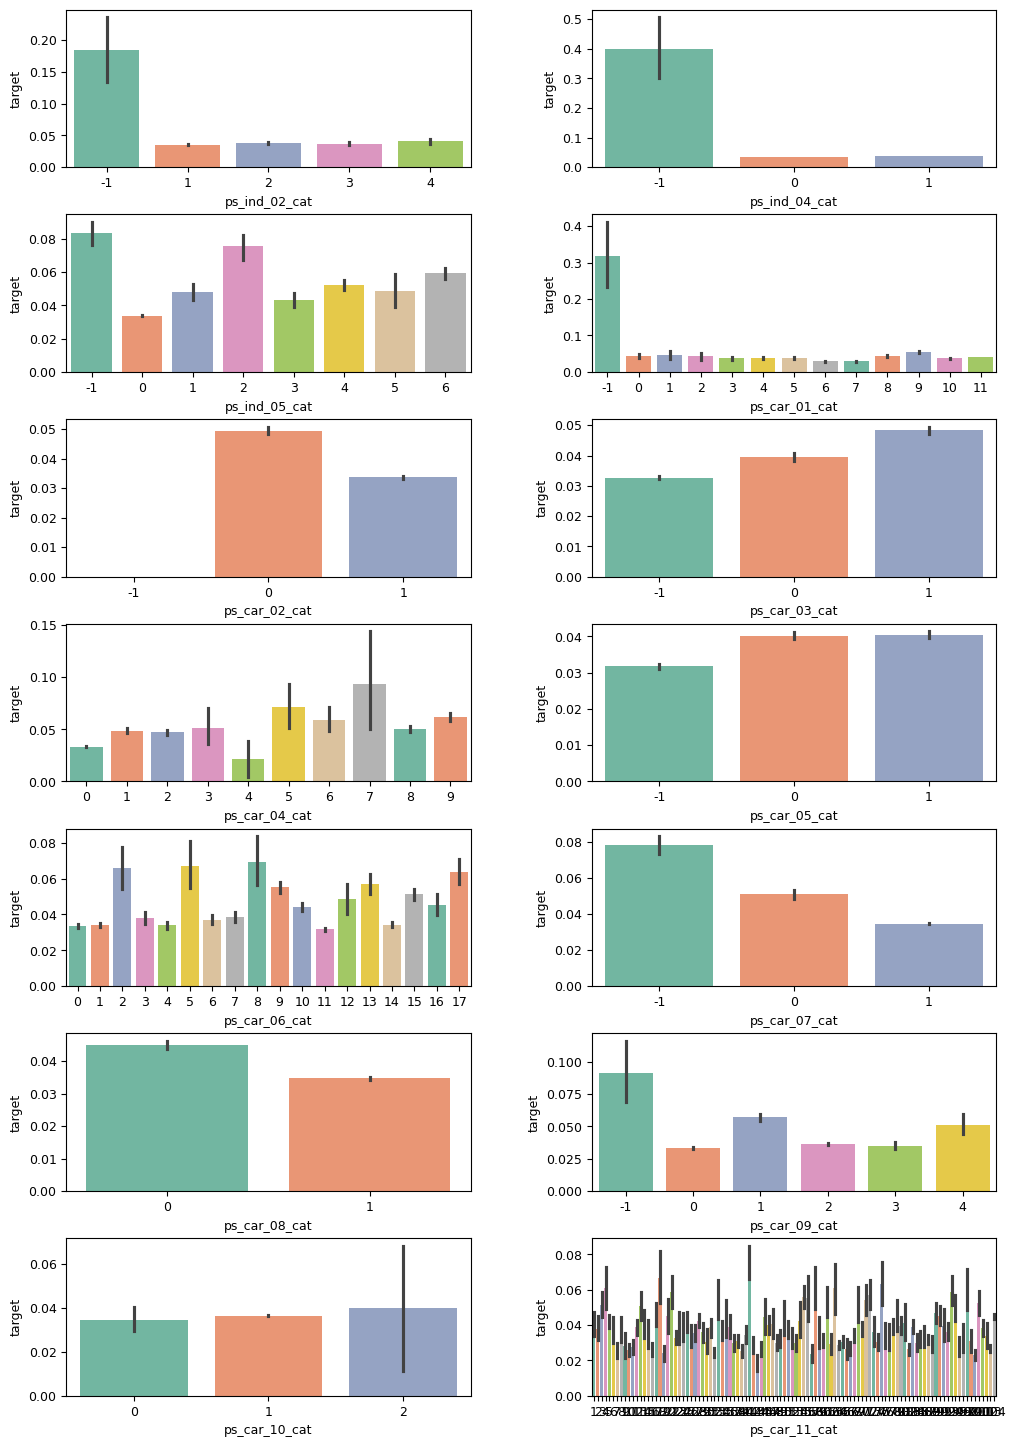

In [ ]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index

plot_target_ratio_by_features(train, nom_features, 7, 2)

- -1 값을 포함하는 즉, 결측값을 나타내는 피처가 많으므로, 결측값이 많지 않다면 다른 값으로 대체하고, 결측값이 많다면 해당 피처를 제거한다. 하지만, 결측값 자체가 타깃값 예측에 도움을 줄 수도 있다는 점을 생각하자.

- ps_ind_02_cat
    - 결측값 -1이 다른 고윳값들보다 타깃값 1의 비율이 크다. 결측값 자체가 타깃값에 대한 예측력이 있다고 판단되므로, 그대로 모델링에 사용한다. 즉, -1 또한 하나의 고윳값이라고 간주한다.

- ps_car_02_cat
    - -1일 때 타깃값 1의 비율이 0%이므로, 피처 값이 -1이면 타깃값이 0이라고 판단할 수 있다.

- ps_ind_02_cat, ps_car_02_cat, ps_car_01_cat
    - -1을 제외한 다른 고윳값의 경우 타깃값 1의 비율이 비슷하다. -1의 신뢰구간이 넓지만, -1의 신뢰하한과 다른 고윳값들의 신뢰상한 간 차이가 크므로 이들은 모델링에 필요한 피처로 판단된다.

- ps_car_10_cat
    - 고윳값들간의 타깃값 1의 평균 비율이 비슷하다. 하지만, 고윳값 2의 신뢰구간이 유독 넓으므로 제거하기에 애매하다. 이후, 모델링 시 제거할 때와 그렇지 않을 때를 나눠서 성능을 확인해본다.

- 명목형 피처는 모두 모델링에 이용한다.

### 순서형 피처

<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
<ipython-input-18-e8c428f22c2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

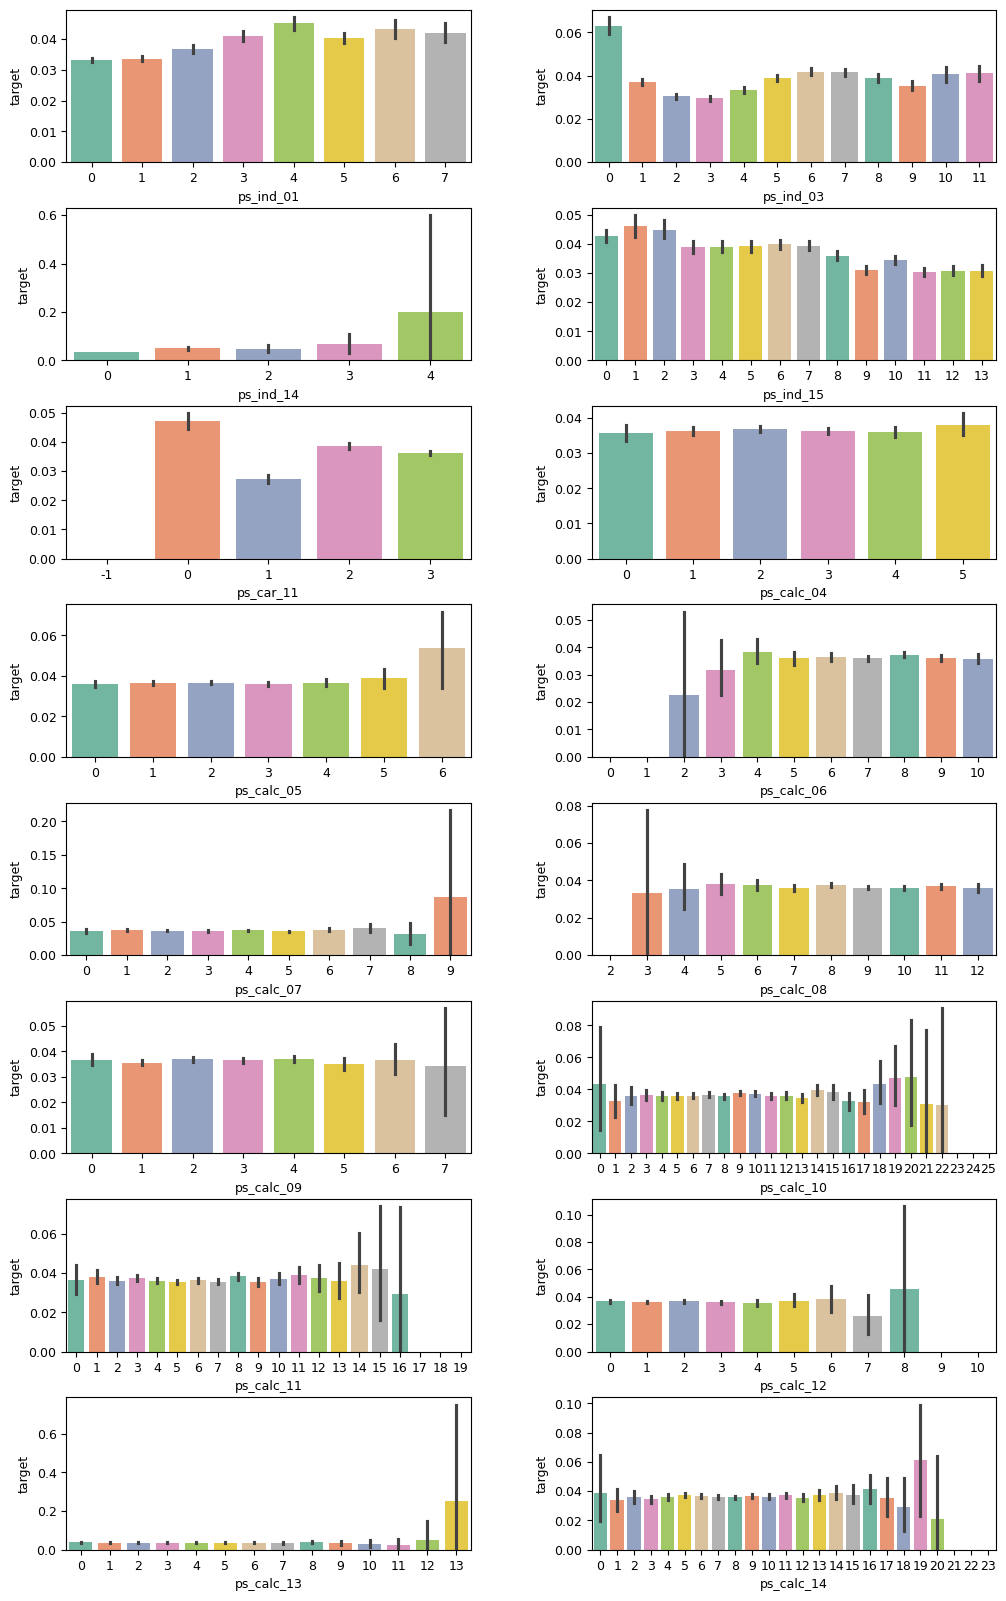

In [ ]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index
plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))

- ps_ind_01
    - 고윳값 4의 신뢰구간이 다른 고윳값들에 비해 타깃값 1의 비율이 높지만, 신뢰구간이 지나치게 넓으므로 통계적 유효성이 떨어진다. 따라서, 해당 피처는 이후 제거하도록 한다.

- ps_calc_04 ~ 14
    - 고윳값별 타깃값 1의 비율이 비슷하거나, 그렇지 않더라도 신뢰구간이 지나치게 넓으므로 해당 피처들은 모두 제거하도록 한다.

### 연속형 피처

**To-do**
- 연속형 피처는 연속된 값이므로 고윳값이 굉장히 많다. 따라서, 값을 몇 개의 구간으로 나눠서 구간별 타깃값 1의 비율을 구한다.
- cut() 함수 사용
    - ```pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0], 3)```
    - 3 : 나눌 구간의 개수 입력

- 연속형 피처 간 '상관관계'를 파악한다.
    - 일반적으로 강한 상관관계를 보이는 두 피처가 있으면 예측력도 비슷하므로 둘 중 하나를 제거한다.

<ipython-input-24-566075c8f760>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
<ipython-input-24-566075c8f760>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
<ipython-input-24-566075c8f760>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
<ipython-input-24-566075c8f760>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

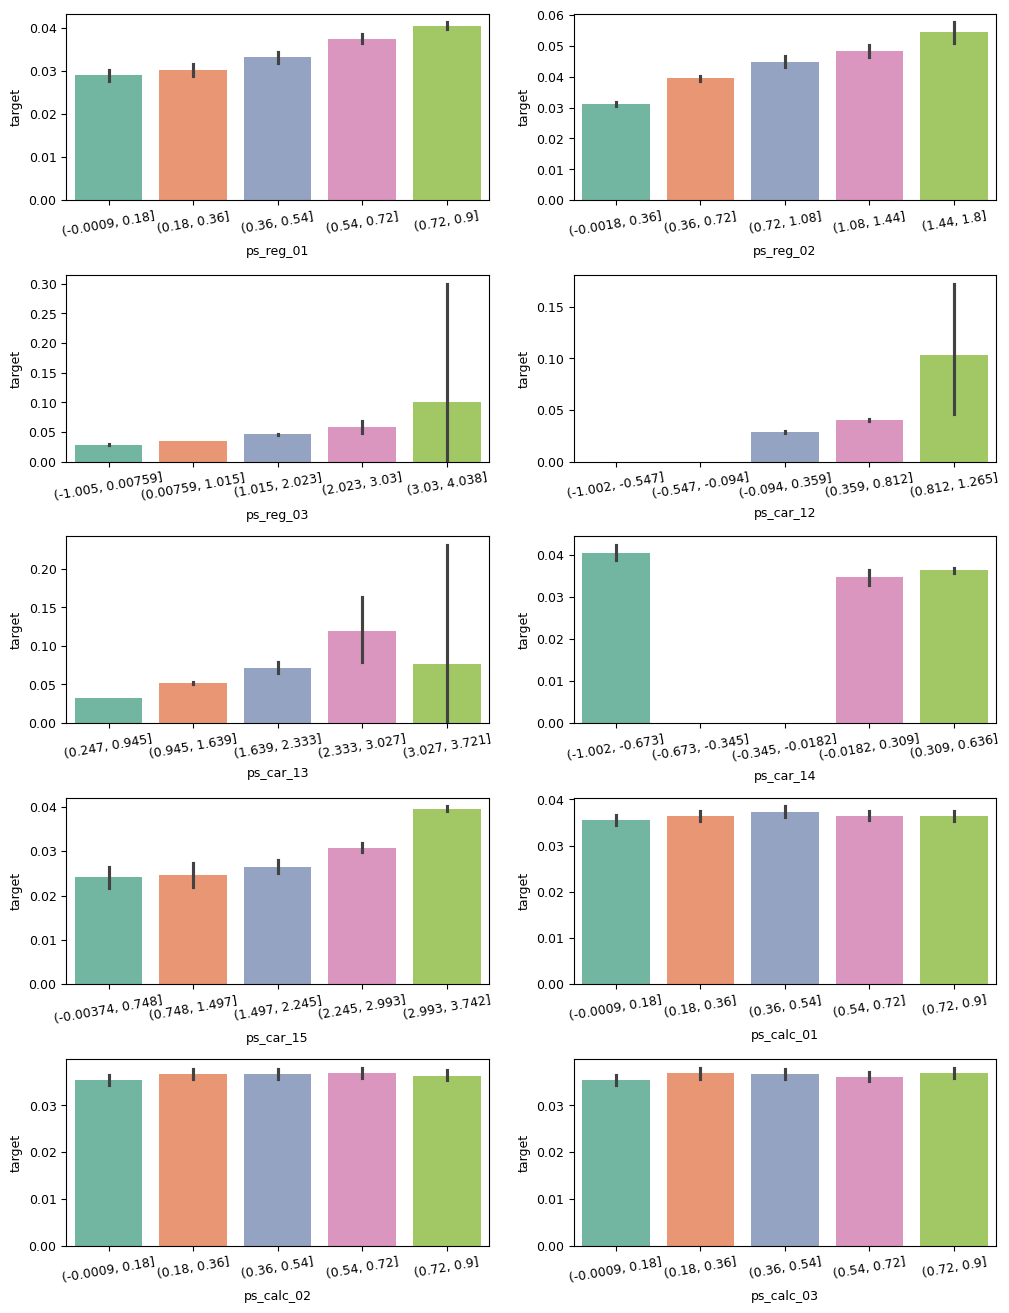

In [ ]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index

plt.figure(figsize=(12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10)

- ps_calc_01 ~ 03
    - 구간별 타깃값 비율 차이가 없으므로 제거하도록 한다.

In [ ]:
# 결측값 제거
train_copy = pd.read_csv(data_path + 'train.csv', index_col='id')
train_copy = train_copy.replace(-1, np.NaN)
train_copy = train_copy.dropna()

<Axes: >

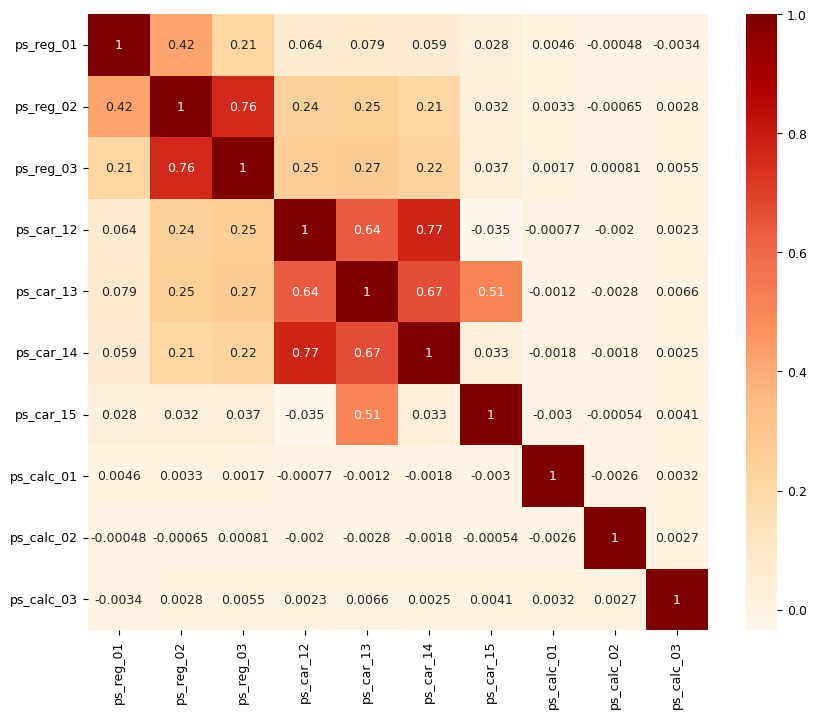

In [ ]:
plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd')

- ps_car_12 & ps_car_14, ps_reg_02 & ps_ref_03
    - 둘 중 하나를 제거해야 할 만큼의 강한 상관관계는 아니지만, 모델링시 확인해본다.

# 베이스라인 모델

**To-do**
- LightGBM을 사용한다.

In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/Kaggle/Safe_Driver_Prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

## 피처 엔지니어링

### 데이터 합치기

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

In [ ]:
# 전체 피처 중 원하는 피처만 추출하기 위해 all_features 변수를 따로 저장한다.
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

### 명목형 피처 원-핫 인코딩

**To-do**
- 명목형 데이터는 고윳값별 순서가 따로 없기 때문에 모든 명목형 피처에 원-핫 인코딩을 적용한다.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처 추출
cat_features = [feature for feature in all_features if 'cat' in feature]

# 원-핫 인코딩 객체 생성
onehot_encoder = OneHotEncoder()

encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])
encoded_cat_matrix # 184개의 열 생성

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

### 필요 없는 피처 제거

**To-do**
- 탐색적 데이터 분석에서 파악한 제거해야 할 피처를 제거한다.
    - calc 분류에 속하는 20개 피처
    - ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_car_14
- 남겨진 피처를 포함하는 데이터와 앞서 명목형 피처를 원-핫 인코딩한 encoded_cat_matrix를 합친다.

In [ ]:
# 추가로 제거할 피처
drop_features = ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_car_14']

# '1) 명목형 피처, 2) calc 분류의 피처, 3) 추가 제거할 피처'를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and
                          'calc' not in feature and
                          feature not in drop_features)]

In [ ]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), # csr_matrix()는 전달받은 데이터를 CSR 형식으로 바꿔줌
                               encoded_cat_matrix],                             # hstack()은 행렬을 수평 방향으로 합침
                              format='csr')

### 데이터 나누기

In [ ]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

## 평가지표 계산 함수 작성

**To-do**
- 지니계수는 파이썬이나 사이킷런에서 기본으로 제공되지 않으므로 직접 만들어서 사용한다.

### 지니계수란?

- 경제학 : 소득 불평등 정도를 나타내는 지표
    - 작을수록 소득 수준이 평등하고, 클수록 불평등하다는 것을 의미
- 로렌츠 곡선을 이용해 계산
    - 로렌츠 곡선이란 인구 누적 비율과 해당 소득 누적 점유율을 연결한 선을 의미
- 머신러닝 : 모델의 예측 성능을 측정하는데 사용
    - 예측값을 크기순으로 정렬해서 로렌츠 곡선을 구함
    - 2 x ROC AUC - 1
    - 평가지표가 지니계수이면 ROC AUC의 상황과 거의 비슷

### 정규화 지니계수 계산 함수

- 정규화 지니계수 = 예측값에 대한 지니계수 / 예측이 완벽할 때의 지니계수
    - 예측값에 대한 지니계수 : 예측값과 실젯값으로 구한 지니계수
    - 예측이 완벽할 때의 지니계수 : 실젯값과 실젯값으로 구한 지니계수

In [ ]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실젯값과 예측값의 크기가 서로 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0] # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order)
    G_true = np.sum(L_mid - L_true) # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [ ]:
# LightGBM용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label() # 데이터의 타깃값 반환
    return 'gini', eval_gini(labels, preds), True # 반환값 : 평가지표 이름, 평가 점수, 평가 점수가 높을수록 좋은지 여부

## 모델 훈련 및 성능 검증

### OOF(Out of Fold prediction) 예측 방식

K-폴드 교차 검증을 수행하면서 각 폴드마다 테스트 데이터로 예측하는 방식

**예측 절차**
1. 전체 훈련 데이터를 K개 그룹으로 나눈다.
2. K개 그룹 중 한 그룹은 검증 데이터, 나머지 K-1개 그룹은 훈련 데이터로 지정한다.
3. 훈련 데이터로 모델을 훈련한다.
4. 훈련된 모델을 이용해 검증 데이터로 타깃 확률을 예측하고, 전체 테스트 데이터로도 타깃 확률을 예측한다.
5. 검증 데이터로 구한 예측 확률과 테스트 데이터로 구한 예측 확률을 기록한다.
6. 검증 데이터를 다른 그룹으로 바꿔가며 2 ~ 5번 절차를 총 K번 반복한다.
7. K개 그룹의 검증 데이터로 예측한 확률을 훈련 데이터 실제 타깃값과 비교해 성능 평가점수를 계산한다. 이 점수로 모델 성능을 가늠해볼 수 있다.
8. 테스트 데이터로 구한 K개 예측 확률의 평균을 구한다. 이 값이 최종 예측 확률이며, 제출해야 하는 값이다.

**장점**
1. 과대적합 방지 효과가 있다.
2. 앙상블 효과가 있어 모델 성능이 좋아진다.

### OOF방식으로 LightGBM 훈련

**To-do**
- 타깃값이 불균형하기 때문에 층화 K 폴드 교차 검증기를 생성한다. **StratifiedKFold()**

In [ ]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991) # 훈련데이터가 시계열 데이터가 아니라면 섞어주는 것이 좋다.

In [ ]:
# LightGBM 하이퍼파라미터 설정
params = {'objective': 'binary', # 이진분류
          'learning_rate': 0.01,
          'force_row_wise': True, # 경고 문구를 없애려고 추가한 파라미터
          'random_state': 0}

In [ ]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

In [ ]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
import lightgbm as lgb
from lightgbm import early_stopping

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#' * 40, f'폴드 {idx + 1} / 폴드 {folds.n_splits}', '#' * 40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋

    early_stopping_rounds = 100
    callbacks=[early_stopping(stopping_rounds=early_stopping_rounds)]
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params,              # 훈련용 하이퍼파라미터
                          train_set=dtrain,           # 훈련 데이터셋
                          num_boost_round=1000,       # 부스팅 반복 횟수
                          valid_sets=dvalid,          # 검증 데이터셋
                          feval=gini,                 # 검증용 평가지표
                          early_stopping_rounds=100,   # 조기종료 조건
                          verbose_eval=100)           # 100번째마다 점수 출력


    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터와 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx + 1} 지니계수: {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[500]	valid_0's binary_logloss: 0.151713	valid_0's gini: 0.287944
[600]	valid_0's binary_logloss: 0.151672	valid_0's gini: 0.288637
[700]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.288939
Early stopping, best iteration is:
[681]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.289034
폴드 1 지니계수: 0.2890336154188232

###########

In [ ]:
print('OOF 검증 데이터 지니계수: ', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수:  0.2804995714877777


## 예측 및 결과 제출

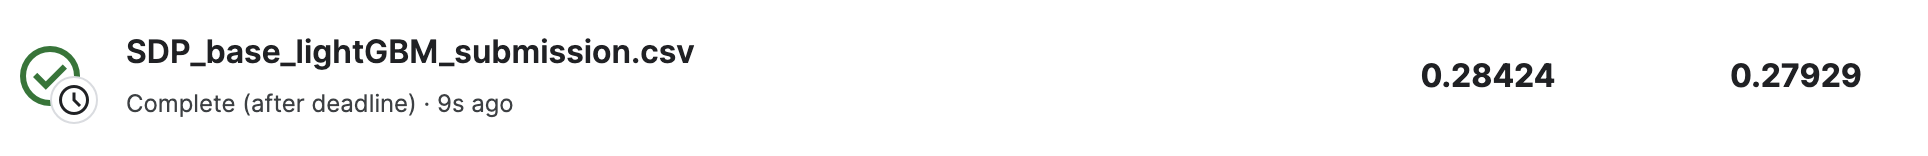

In [ ]:
submission['target'] = oof_test_preds
submission.to_csv('SDP_base_lightGBM_submission.csv')

# 성능 개선1

**To-do**
- 피처 엔지니어링 & 하이퍼파라미터 최적화 적용
    - 파생 피처 추가, 베이지안 최적화

In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/Kaggle/Safe_Driver_Prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

## 피처 엔지니어링

### 데이터 합치기

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

all_features = all_data.columns

### 명목형 피처 원-핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

### 파생 피처 추가

**To-do**
- 한 데이터가 가진 결측값 개수를 파생 피처로 만들어본다.
- ind 분류의 피처를 살펴본다.
    - 18개의 모든 ind 피처를 연결한 새로운 피처를 만든다.
- 명목형 피처의 고윳값별 개수를 새로운 피처로 추가한다.

In [ ]:
# '데이터 하나당 결측값 개수'를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)
all_data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,num_missing
0,2,2,5,1,0,0,1,0,0,0,...,1,5,8,0,1,1,0,0,1,1
1,1,1,7,0,0,0,0,1,0,0,...,1,1,9,0,1,1,0,1,0,2
2,5,4,9,1,0,0,0,1,0,0,...,2,7,7,0,1,1,0,1,0,3
3,0,1,2,0,0,1,0,0,0,0,...,2,4,9,0,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,1,1,3,0,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488023,0,1,6,0,0,0,1,0,0,0,...,2,3,4,0,1,0,0,1,0,1
1488024,5,3,5,1,0,0,0,1,0,0,...,2,2,11,0,0,1,1,0,0,1
1488025,0,1,5,0,0,1,0,0,0,0,...,2,2,11,0,1,1,0,0,0,2
1488026,6,1,5,1,0,0,0,0,1,0,...,1,2,7,1,1,0,0,0,0,1


- remaining_features는 명목형 피처와 calc 분류의 피처를 제외한 나머지 피처명으로 정의한다.
- 명목형 피처는 원-핫 인코딩을 할 것이기 때문에 제외한다. 또한, calc 분류는 탐색적 데이터 분석에서 필요 없는 피처로 판별되었으므로 제외한다.

In [ ]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)]

# num_missing을 remaining_feature에 추가
remaining_features.append('num_missing')

In [ ]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [ ]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

- 명목형 피처의 고윳값별 개수를 새로운 피처로 추가한다.
    - ```value_counts()``` : Series 타입을 반환한다.
    - ```to_dict()``` : Series 타입을 딕셔너리 타입으로 바꾼다.

In [ ]:
all_data['ps_ind_02_cat'].value_counts()

ps_ind_02_cat
 1    1079327
 2     309747
 3      70172
 4      28259
-1        523
Name: count, dtype: int64

In [ ]:
all_data['ps_ind_02_cat'].value_counts().to_dict()

{1: 1079327, 2: 309747, 3: 70172, 4: 28259, -1: 523}

In [ ]:
cat_count_features = []
for feature in cat_features + ['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [ ]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

### 필요 없는 피처 제거

In [ ]:
from scipy import sparse

# 필요 없는 피처들
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remaining = all_data[remaining_features + cat_count_features].drop(drop_features, axis=1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining), encoded_cat_matrix], format='csr')

### 데이터 나누기

In [ ]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

## 하이퍼파라미터 최적화

**To-do**
- 베이지안 최적화 기법을 활용해 하이퍼파라미터를 조정한다.

### 데이터셋 준비

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

### (베이지안 최적화용) 평가지표 계산 함수 작성

In [ ]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction, bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''

    # 베이지안 최적화를 수행할 하이퍼퍼라미터
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}

    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터: ', params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params,
                          train_set=bayes_dtrain,
                          num_boost_round=2500,
                          valid_sets=bayes_dvalid,
                          feval=gini,
                          early_stopping_rounds=300,
                          verbose_eval=False)

    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

### 최적화 수행

In [ ]:
!pip install lightgbm==3.3.2

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)

In [ ]:
optimizer.maximize(init_points=3, n_iter=6) # init_points : 무작위로 하이퍼파라미터를 탐색하는 횟수, n_iter : 베이지안 최적화 반복 횟수

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터:  {'num_leaves': 39, 'lambda_l1': 0.7766883037651555, 'lambda_l2': 0.9791725038082665, 'feature_fraction': 0.6963662760501029, 'bagging_fraction': 0.867531900234624, 'min_child_samples': 8, 'min_child_weight': 27.04133683281797, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2837380537005777

| 1         | 0.2837    | 0.8675    | 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2828993761731121

| 6         | 0.2829    | 0.8978    | 0.6594    | 0.8445    | 0.9234    | 8.619     | 10.55     | 30.09     |
하이퍼파라미터:  {'num_leaves': 37, 'lambda_l1': 0.7738449330497988, 'lambda_l2': 0.9032695189818599, 'feature_fraction': 0.6606341064409726, 'bagging_fraction': 0.7666713964943057, 'min_child_samples': 9, 'min_child_weight': 29.306172421380474, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.28513273331754563

| 7         | 0.2851    | 0.7667    | 0.6606    | 0.7738    | 0.9033    | 8.769     | 29.31     | 36.6      |
하이퍼파라미터:  {'num_leaves': 40, 'lambda_l1': 0.7113567244294035, 'lambda_l2': 0.9992148463611682, 'feature_fraction': 0.6823972673568225, 'bagging_fraction': 0.6452323984860321, 'min_child_samples': 9, 'min_child_weight': 36.23198396337493, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.28549714593923864

| 8         | 0.2855    | 0.6452    | 0.6824    | 0.7114    | 0.9992    | 9.083     | 36.23     | 39.59     |
하이퍼파라미터:  {'num_leaves': 40, 'lambda_l1': 0.7123856604910637, 'lambda_l2': 0.9, 'feature_fraction': 0.6, 'bagging_fraction': 0.6308052293925571, 'min_child_samples': 10, 'min_child_weight': 35.12087739961775, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.285683535346779

| 9         | 0.2857    | 0.6308    | 0.6       | 0.7124    | 0.9       | 9.582     | 35.12     | 40.0      |
하이퍼파라미터:  {'num_leaves': 40, 'lambda_l1': 0.8938149045121299, 'lambda_l2': 0.9758294520340495, 'feature_fraction': 0.6745065123466172, 'bagging_fraction': 0.8355635247195701, 'min_child_samples': 8, 'min_child_weight': 35.32471536503445, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.28545822231548373

| 10        | 0.2855    | 0.8356    | 0.6745    | 0.8938    | 0.9758    | 7.937     | 35.32     | 39.91     |
하이퍼파라미터:  {'num_leaves': 40, 'lambda_l1': 0.7317417776098459, 'lambda_l2': 0.9864641335598454, 'feature_fraction': 0.6015848845697799, 'bagging_fraction': 0.760069778741499, 'min_child_samples': 9, 'min_child_weight': 32.892369776842756, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수 : 0.2854575268175317

| 11        | 0.2855    | 0.7601    | 0.6016    | 0.7317    | 0.9865    | 8.608     | 32.89     | 39.99     |


### 결과 확인

In [ ]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [ ]:
# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

In [ ]:
max_params

## 모델 훈련 및 성능 검증

**To-do**
- 그리드서치와 달리 베이지안 최적화는 최적화된 하이퍼파라미터로 훈련된 모델을 제공하지 않으므로 찾은 하이퍼파라미터를 활용해서 모델을 다시 훈련한다.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds_lgb = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#' * 40, f'폴드 {idx + 1} / 폴드 {folds.n_splits}', '#' * 40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=max_params,
                          train_set=dtrain,
                          num_boost_round=2500,
                          valid_sets=dvalid,
                          feval=gini,
                          early_stopping_rounds=300,
                          verbose_eval=100)

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds_lgb += lgb_model.predict(X_test) / folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx + 1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154239	valid_0's gini: 0.270944
[200]	valid_0's binary_logloss: 0.153176	valid_0's gini: 0.275764
[300]	valid_0's binary_logloss: 0.152584	valid_0's gini: 0.279501
[400]	valid_0's binary_logloss: 0.152222	valid_0's gini: 0.282893
[500]	valid_0's binary_logloss: 0.151986	valid_0's gini: 0.286058
[600]	valid_0's binary_logloss: 0.151824	valid_0's gini: 0.288805
[700]	valid_0's binary_logloss: 0.151712	valid_0's gini: 0.290719
[800]	valid_0's binary_logloss: 0.151622	valid_0's gini: 0.292581
[900]	valid_0's binary_logloss: 0.151552	valid_0's gini: 0.294212
[1000]	va

In [ ]:
print('OOF 검증 데이터 지니계수 : ', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 :  0.2889651000887542


## 예측 및 결과 제출

In [ ]:
submission['target'] = oof_test_preds_lgb
submission.to_csv('SDP_improve1_lightGBM_submission.csv')

# 성능 개선 2

**To-do**
- 모델을 XGBoost로 변경한다.
    - 전반적은 프로세스는 앞과 같으나 몇 가지 수정을 한다.
        - 지니계수 반환값 : XGBoost용 지니계수 계산 함수는 반환값이 평가지표명, 평가점수 2개이다. '평가점수가 높으면 좋은지 여부'는 XGBoost 모델 객체의 train() 메서드에 따로 전달해야 한다.
        - 데이터셋 객체
        - 모델 하이퍼파라미터명

## 피처 엔지니어링

In [ ]:
# XGBoost용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

## 하이퍼파라미터 최적화

### 데이터셋 준비

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=0)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [ ]:
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9),
                'colsample_bytree': (0.7, 1.0),
                'min_child_weight': (5, 7),
                'gamma': (8, 11),
                'reg_alpha': (7, 9),
                'reg_lambda': (1.1, 1.5),
                'scale_pos_weight': (1.4, 1.6)}

fixed_params = {'objective': 'binary:logistic',
                'learning_rate': 0.02,
                'random_state': 1991}

### (베이지안 최적화용) 평가지표 계산 함수 작성

In [ ]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight, reg_alpha, gamma, reg_lambda, scale_pos_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''

    # 베이지안 최적화를 수행할 하이퍼퍼라미터
    params = {'max_depth': int(round(max_depth)),
             'subsample': subsample,
             'colsample_bytree': colsample_bytree,
             'min_child_weight': min_child_weight,
             'gamma': gamma,
             'reg_alpha': reg_alpha,
             'scale_pos_weight': scale_pos_weight}

    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터: ', params)

    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=params,
                          dtrain=bayes_dtrain,
                          num_boost_round=2000,
                          evals=[(bayes_dvalid, 'bayes_dvalid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=False)

    best_iter = xgb_model.best_iteration # 최적 반복 횟수

    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid, iteration_range=(0, best_iter))

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

### 최적화 수행

In [ ]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)

optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터:  {'max_depth': 6, 'subsample': 0.867531900234624, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'gamma': 10.14556809911726, 'reg_alpha': 7.84730959867781, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.27740102006743705

| 1         | 0.2774    | 0.8646    | 10.15     | 6.411     | 6.09      | 7.847     | 1.358     | 1.488     | 0.8675    |
하이퍼파라미터:  {'max_depth': 7, 'subsample': 0.6261387899104622, 'colsample_bytree': 0.9890988281503088, 'min_child_weight': 6.0577898395058085, 'gamma': 9.150324556477333, 'reg_alpha': 8.136089122187865, 'scale_pos_weight': 1.4142072116395774, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
지니계수 : 0.2790893170843339

| 2         | 0.2791    | 0.9891    | 9.15      | 7.167     | 6.058     | 8.136     | 1.47      | 1.414     | 0.6261    |
하이퍼파라미터:  {'max_depth': 7, 'subsample': 0.8341587528859367, 'colsample_bytree': 0.7060655192320977, 'min_child_weight': 6.7400242964936385, 'gamma': 10.497859536643814, 'reg_alpha': 8.957236684465528, 'scale_pos_weight': 1.4922958724505864, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
지니계수 : 0.2771352751522933

| 3         | 0.2771    | 0.7061    | 1

/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.2775069985896677

| 4         | 0.2775    | 0.8843    | 10.45     | 6.838     | 6.494     | 8.552     | 1.381     | 1.423     | 0.7002    |
하이퍼파라미터:  {'max_depth': 7, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 5.980449923152521, 'gamma': 8.629699476632183, 'reg_alpha': 8.093948706193059, 'scale_pos_weight': 1.4010657757522489, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.2807901694567013

| 5         | 0.2808    | 1.0       | 8.63      | 7.392     | 5.98      | 8.094     | 1.494     | 1.401     | 0.6       |
하이퍼파라미터:  {'max_depth': 8, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 5.762501560540492, 'gamma': 8.0, 'reg_alpha': 8.006910334061534, 'scale_pos_weight': 1.4, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.28227826819683677

| 6         | 0.2823    | 1.0       | 8.0       | 7.91      | 5.763     | 8.007     | 1.5       | 1.4       | 0.6       |
하이퍼파라미터:  {'max_depth': 8, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 6.9558740548204385, 'gamma': 8.0, 'reg_alpha': 7.0, 'scale_pos_weight': 1.4, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.28231235568366964

| 7         | 0.2823    | 1.0       | 8.0       | 8.0       | 6.956     | 7.0       | 1.5       | 1.4       | 0.6       |
하이퍼파라미터:  {'max_depth': 8, 'subsample': 0.6, 'colsample_bytree': 0.7, 'min_child_weight': 5.0, 'gamma': 8.0, 'reg_alpha': 7.0, 'scale_pos_weight': 1.4, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.28126725679020936

| 8         | 0.2813    | 0.7       | 8.0       | 8.0       | 5.0       | 7.0       | 1.1       | 1.4       | 0.6       |
하이퍼파라미터:  {'max_depth': 8, 'subsample': 0.6, 'colsample_bytree': 0.7, 'min_child_weight': 7.0, 'gamma': 8.0, 'reg_alpha': 8.799851023159986, 'scale_pos_weight': 1.6, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


지니계수 : 0.2822473913226425

| 9         | 0.2822    | 0.7       | 8.0       | 8.0       | 7.0       | 8.8       | 1.1       | 1.6       | 0.6       |


### 결과 확인

In [ ]:
max_params = optimizer.max['params']

In [ ]:
max_params['max_depth'] = int(round(max_params['max_depth']))
max_params.update(fixed_params)

## 모델 훈련 및 성능 검증

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds_xgb = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#' * 40, f'폴드 {idx + 1} / 폴드 {folds.n_splits}', '#' * 40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # XGBoost 전용 데이터셋 생성
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)

    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=max_params,
                          dtrain=dtrain,
                          num_boost_round=2000,
                          evals=[(dvalid, 'valid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter = xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds_xgb += xgb_model.predict(dtest, iteration_range=(0, best_iter)) / folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, iteration_range=(0, best_iter))

    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx + 1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	valid-logloss:0.21709	valid-gini:0.20055
[100]	valid-logloss:0.15966	valid-gini:0.27407
[200]	valid-logloss:0.15457	valid-gini:0.28659
[300]	valid-logloss:0.15386	valid-gini:0.29198
[400]	valid-logloss:0.15374	valid-gini:0.29357
[500]	valid-logloss:0.15370	valid-gini:0.29435
[600]	valid-logloss:0.15368	valid-gini:0.29465
[700]	valid-logloss:0.15367	valid-gini:0.29487
[800]	valid-logloss:0.15366	valid-gini:0.29529
[900]	valid-logloss:0.15367	valid-gini:0.29552
[1000]	valid-logloss:0.15364	valid-gini:0.29575
[1100]	valid-logloss:0.15363	valid-gini:0.29583
[1200]	valid-logloss:0.15365	valid-gini:0.29586
[1300]	valid-logloss:0.15364	valid-gini:0.29586
[1400]	valid-logloss:0.15363	valid-gini:0.29588
[1438]	valid-logloss:0.15363	valid-gini:0.29590
폴드 1 지니계수 : 0.29597078529870374

######################################## 폴드 2 / 폴드 5 ########################################
[0]	valid-logloss:0.21709	valid-gini:0.19290
[100]	valid-logloss:0.15988	valid-gini:0.26096
[200]	valid-logloss:0.154

In [ ]:
print('OOF 검증 데이터 지니계수 : ', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 :  0.2860206133547507


## 예측 및 결과 제출

In [ ]:
submission['target'] = oof_test_preds_xgb
submission.to_csv('SDP_improve2_XGBoost_submission.csv')

# 성능 개선 3

**To-do**
- LightGBM, XGBoost 모델의 예측값을 결합하는 앙상블 기법을 적용해본다.

## 앙상블 수행

In [ ]:
oof_test_preds = oof_test_preds_lgb * 0.5 + oof_test_preds_xgb * 0.5

## 예측 및 결과 제출

In [ ]:
submission['target'] = oof_test_preds
submission.to_csv('SDP_improve3_ensemble_submission.csv')